In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from scipy.signal import find_peaks


In [2]:
data = pd.read_csv('tb2_data_clean_2.csv', sep=';')
data.head()

,MMSI,LAT,LON,TIMESTAMP
0,970225972,3.015823,101.241162,1621911341
1,970225972,3.015823,101.241162,1621911339
2,970225972,3.015823,101.241162,1621911337
3,970225972,3.015823,101.241162,1621911335
4,970225972,3.015823,101.241162,1621911333


In [3]:
data = data.iloc[:,1:3]
data

,LAT,LON
0,3.015823,101.241162
1,3.015823,101.241162
2,3.015823,101.241162
3,3.015823,101.241162
4,3.015823,101.241162
...,...,...
246469,2.854273,101.260145
246470,-0.041003,109.112885
246471,-0.040998,109.112870
246472,2.369827,101.999303


In [4]:
data.values

array([[ 3.01582333e+00,  1.01241162e+02],
       [ 3.01582333e+00,  1.01241162e+02],
       [ 3.01582333e+00,  1.01241162e+02],
       ...,
       [-4.09983330e-02,  1.09112870e+02],
       [ 2.36982667e+00,  1.01999303e+02],
       [ 2.36984000e+00,  1.01999312e+02]])

In [5]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data.values)
    Sum_of_squared_distances.append(km.inertia_)

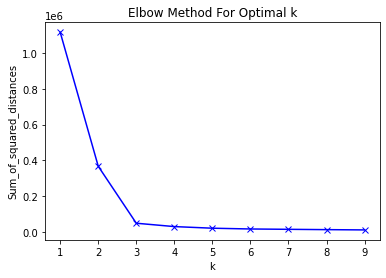

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
k_means = KMeans(n_clusters=7)
k_means.fit(data.values)
clusters = k_means.fit_predict(data.values)

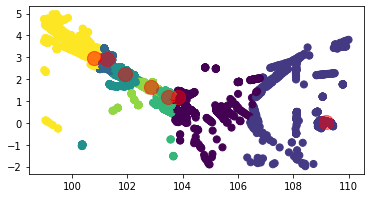

In [10]:
plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [10]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    return distances

distances = []
for i, (cx, cy) in enumerate(centers):
    print(i, cx, cy)
    mean_distance = k_mean_distance(data.values, cx, cy, i, clusters)
    distances.append(mean_distance)
    print(min(distances[i]))
    print(max(distances[i]))
    print('-----------------------------------')

0 1.2341001956673685 103.55156899065676
0.002568330628438394
3.442617208122237
-----------------------------------
1 0.04562245746358795 109.1880372644811
0.013831189743551109
3.840356994923685
-----------------------------------
2 2.697338128811562 101.42807297857112
0.030948616683781193
3.907862973746791
-----------------------------------


In [11]:
jarak = pd.DataFrame(distances[0])


# scaling data
mms = MinMaxScaler()
mms.fit(jarak)
print(mms.data_min_)
print(mms.data_max_)
jarak_scaled = mms.transform(jarak)
print(jarak_scaled.min())
print(jarak_scaled.max())

[0.00256833]
[3.44261721]
0.0
1.0


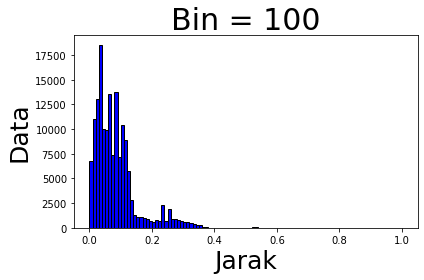

array([6.8030e+03, 1.0993e+04, 1.3053e+04, 1.8559e+04, 1.0040e+04,
       9.9380e+03, 1.3508e+04, 7.3710e+03, 1.3800e+04, 7.1700e+03,
       1.0419e+04, 8.9090e+03, 5.8020e+03, 2.8370e+03, 1.2870e+03,
       1.1040e+03, 1.0610e+03, 9.6100e+02, 8.5700e+02, 6.8100e+02,
       6.2200e+02, 7.4000e+02, 7.3700e+02, 2.2850e+03, 6.6200e+02,
       1.9190e+03, 8.6800e+02, 9.3000e+02, 7.7500e+02, 7.0000e+02,
       5.6300e+02, 5.4400e+02, 4.8600e+02, 3.7300e+02, 2.6200e+02,
       2.4500e+02, 1.2200e+02, 3.7000e+01, 4.0000e+00, 3.0000e+00,
       2.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
       3.0000e+00, 1.4000e+01, 3.4000e+01, 3.3000e+01, 2.7000e+01,
       2.2000e+01, 7.0000e+00, 2.2000e+01, 8.0000e+00, 5.0000e+00,
       1.0000e+01, 4.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00,
       5.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00,
       1.0000e+00, 2.0000e+00, 5.0000e+00, 5.0000e+00, 1.5000e

In [12]:
binwidth = 100

ax = plt.subplot(111)
hist = ax.hist(jarak_scaled, bins = binwidth,
             color = 'blue', edgecolor = 'black')
ax.set_title('Bin = %d' % binwidth, size = 30)
ax.set_xlabel('Jarak', size = 25)
ax.set_ylabel('Data', size= 25)

plt.tight_layout()
plt.show()
hist[0]

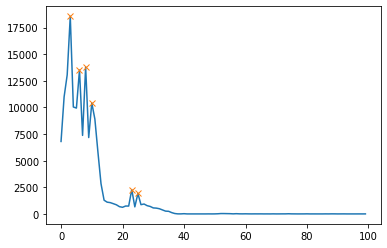

In [13]:
x = hist[0]
peaks, _ = find_peaks(x, height=0, threshold=500)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()